# OBJECTIVE

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

# Data Ingestion

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 marks)


In [1]:
#loading necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df=pd.read_excel("Election_Data.xlsx", sheet_name='Election_Dataset_Two Classes')

In [4]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


#### Inference: 
The top 5 samples from the dataset shows that data contains an unnamed column which should be removed before processing ahead with the data.And the name of the columns contains '.' which would create problem while performing EDA and modelling. Therefore, columns must be renames. 

Also, vote and gender appears categorical whereas rest of the variables are numeric. 


In [5]:
df=df.drop(columns=df.columns[0])
df.rename(columns={"economic.cond.national":"economic_cond_national"}, inplace=True)
df.rename(columns={"economic.cond.household":"economic_cond_household"},inplace=True)
df.rename(columns={"political.knowledge":"political_knowledge"}, inplace=True)

In [6]:
df.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


#### Inference:
The unnamed column is dropped and the columns are renamed successfully. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


#### Info of data
Data contains 1525 entries and there are 9 columns. Out of which 7 are of integer type and 2 are of object type.

In [8]:
df.shape

(1525, 9)

#### Shape of data
The data contains 1525 rows and 9 columns

In [9]:
df.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

#### Missing Values:
There are no missing values present in the data.

In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
#cheching for skewness in the data
print("The skewness value of the data columns: ")
df.skew(axis=0, skipna=True)


The skewness value of the data columns: 


age                        0.144621
economic_cond_national    -0.240453
economic_cond_household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political_knowledge       -0.426838
dtype: float64

#### Statistical Summary of Dataset

#### Insights:
The statistical summary of the dataset shows the count of data entries in each column to be 1525. The mean and standard deviation of the numeric columns are also calucated. The minimum, quartiles and maximum values are also calculated. 
The satistical summary of the age column shows that the min age is 24 and max age is 93, which is an acceptable age range for voters. 
The national economic and household economic worth are metioned on the scale of 1-5 (where 1 is low and 5 is high)
Blair(assesment of labour leader) and Hague(assesment of conservative leader) are also in the range 1-5.
Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
Political knowledge shows knowledge of parties position on range 0-3. 
Since, age has higher mean and std values compared to rest of the columns, While using distance based algorithm scaling would definitely help improve the performance of the model. 

The age column is slightly positively skewed whereas rest of the columns are slightly negatively skewed. 
The skewness can be well observed from the visual representation of the data. 


1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (4 Marks)

## UNIVARIATE ANALYSIS

#### Distribution of continuos variable

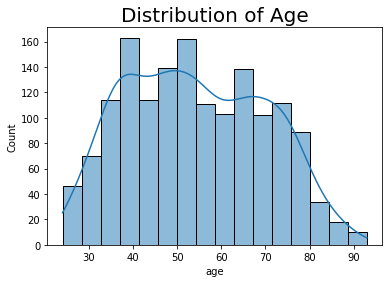

In [12]:
#univariate Analysis
sns.histplot(df.age, kde=True)
plt.title("Distribution of Age", Fontsize=20)
plt.show()

#### Insights:
Age column has continuous data values. Histogram plotted for the age column shows the distribution of age. Age shows a slight positive skewness. The age of the voters range between 20-90. The age group 35-55 votes the most. 


#### Countplot for ordinal variables

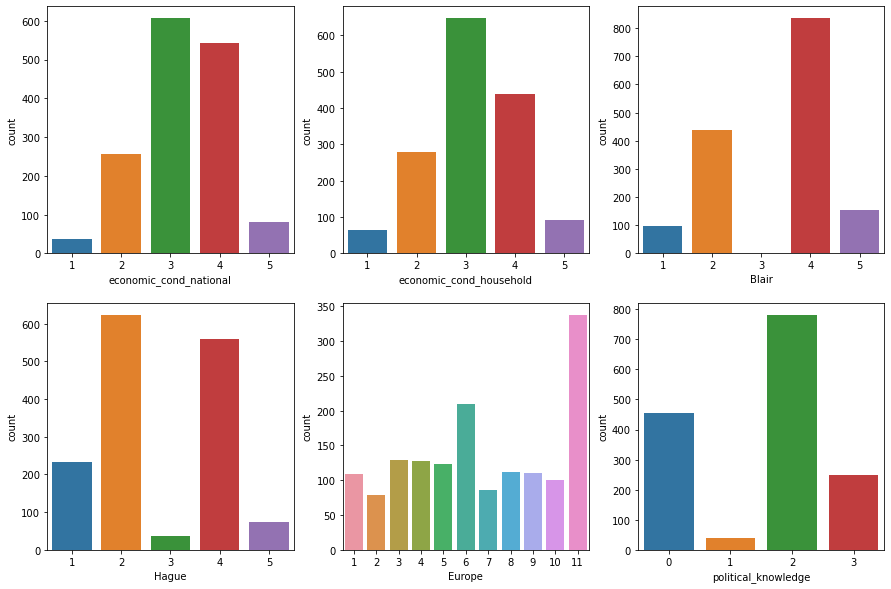

In [13]:
#univariate Analysis
fig, axes= plt.subplots(nrows=2, ncols=3, figsize=(15,10))
sns.countplot(df.economic_cond_national,ax=axes[0][0])
sns.countplot(df.economic_cond_household, ax=axes[0][1])
sns.countplot(df.Blair, ax=axes[0][2])
sns.countplot(df.Hague, ax=axes[1][0])
sns.countplot(df.Europe,ax=axes[1][1])
sns.countplot(df.political_knowledge, ax=axes[1][2])
plt.show()

#### Insights:
National economic worth is an ordinal data. Therefore, countplot is plotted. Most of the voters have more than intermediate national worth. Maximum voters have mentioned 3 as their national worth which is followed by 4. There are very few voters with low and high national worth. 
Household economic worth is an ordinal data. Therefore, countplot is plotted. The data is very similar to the national economic worth. Most of the voters have above intermediate household worth.Maximum voters have mentioned 3 as their household worth which is followed by 4. There are very few voters with very low and very high household worth. 
Blair and Hague shows the assesment of Labour and Conservative parties respectively. Most of the voters has assesed Labour as 4 on scale of 5 which is followd by 3 on scale of 5. Whereas, voters have assesed 2 on scale of 5 to conservative parties which is followed by 4 on sclae of 5. The voters have clearly favoured Labour party. 
Europe is an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment. Most of the respondents have Eurosceptic sentiment as seen from the chat. 
The political knowledge of parties are observed to be either 0 or 2 on sclae of 0-3. 


#### Boxplot & Correlation plot of numerical variables

In [14]:
#Numerical columns
df_num=df.drop(['vote','gender'], axis=1)
df_num.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2


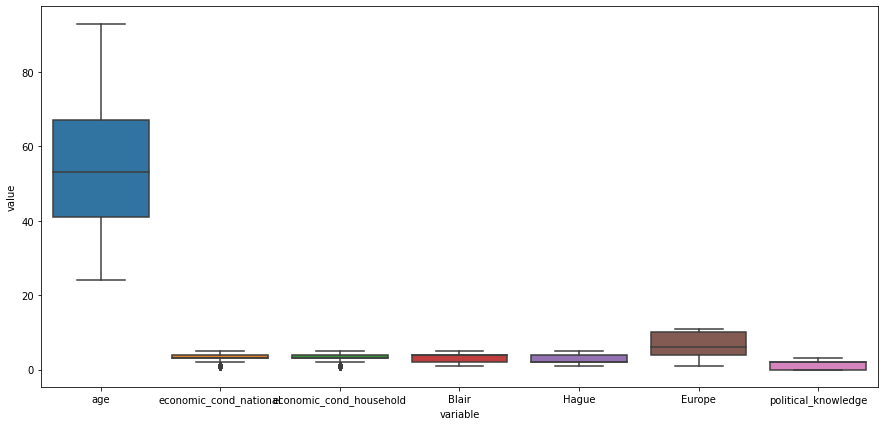

In [15]:
#boxplot to check for outliers
plt.subplots(figsize=(15,7))
sns.boxplot(x="variable", y="value", data=pd.melt(df_num))
plt.show()

In [16]:
#Scaling data
scaler = StandardScaler()
saved_cols=df_num.columns
scaled_df=scaler.fit_transform(df_num)
scaled_df=pd.DataFrame(scaled_df, columns=saved_cols)

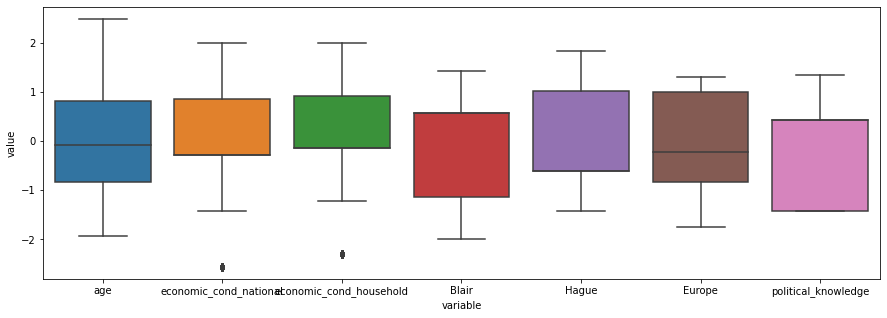

In [17]:
#boxplot to check for outliers
plt.subplots(figsize=(15,5))
sns.boxplot(x="variable", y="value", data=pd.melt(scaled_df))
plt.show()

#### Insights:
Boxplot for all the numerical variables are plotted. The boxplot shows that there is need of scaling of dataset because of difference in scale of age column and other attributes. 
The boxplot also shows that there are no ouliers present in any column except for national and household worth of voters.
These columns should be checked for presence of bad data. 

In [18]:
print("unique values in economic_cond_national", df.economic_cond_national.unique())
print("unique values in economic_cond_household",df.economic_cond_household.unique())

unique values in economic_cond_national [3 4 2 1 5]
unique values in economic_cond_household [3 4 2 1 5]


<AxesSubplot:>

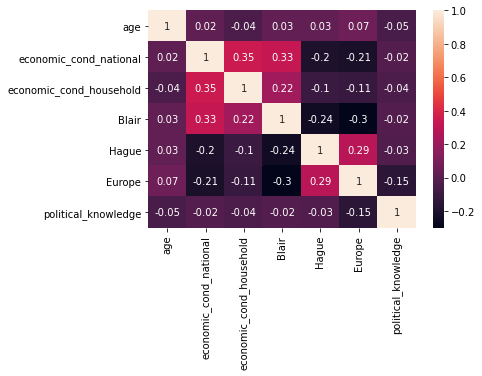

In [19]:
#Correlation plot
corr=df_num.corr()
round(corr,2)
sns.heatmap(round(corr,2), annot=True)

#### Insights:
The correlation plot plot shows the types of correlation between variables. Correlation value close to 1 means very positive correlation, 0 means no correlation and,  -1 means strong negative correlation. Here, economic_cond_national & economic_condition_houselod is positively correlated with value 0.35. Other variables shows no significant correlation. 


## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='vote', ylabel='age'>

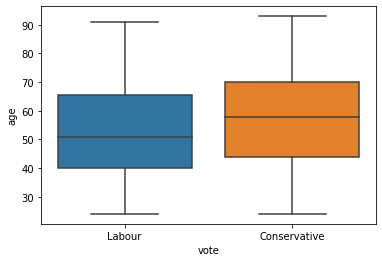

In [20]:
#Bivariate Analysis

sns.boxplot(x='vote', y = 'age', data=df)


#### Significance of age on votes 
The age group 40-70 votes the most. The voters for labour party has median age of 50 yeras whereas voters of conservative party has higher median age close to 60 years. 



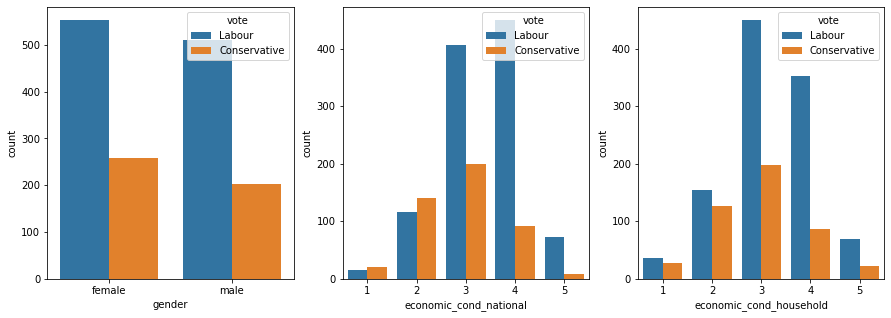

In [21]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.countplot(x='gender', hue='vote', data=df, ax=axs[0])
sns.countplot(x='economic_cond_national', hue='vote', data=df, ax=axs[1])
sns.countplot(x='economic_cond_household', hue='vote', data=df, ax=axs[2])
plt.show()

#### Significance of gender on vote
Both male and females have voted mostly to Labour party. 
whereas number of female voters to both the parties are more compared to male voters. 
#### Significance of economic worth on vote
Voters having average national and household economic worth (3 or 4) are notable voters. They have mostly voted to Labour class. 
However, number of voters of Conservative party is very less compared to Labour party. 



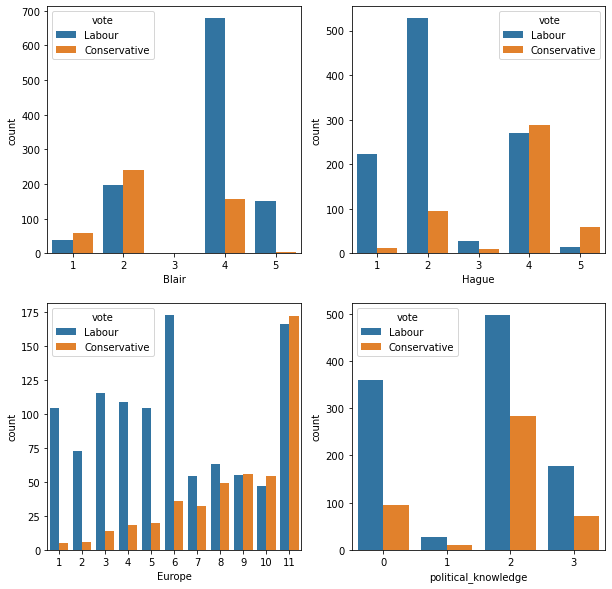

In [22]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.countplot(x='Blair', hue='vote', data=df, ax=axs[0][0])
sns.countplot(x='Hague', hue='vote', data=df, ax=axs[0][1])
sns.countplot(x='Europe', hue='vote', data=df, ax=axs[1][0])
sns.countplot(x='political_knowledge', hue='vote', data=df, ax=axs[1][1])
plt.show()

#### Significance of attitude towards european integration on vote
Voters having higher score are more in numbers. They represent Euroseptic sentiment and they have voted both the parties.However, below average scores have voted mostly to the Labour Party and above average scores have voted almost equally to both the parties. 
The political knowledge shows knowledge of parties' position on European integration. The votes are mostly in favour of Labour party.


#### Significance of assesment of leaders on vote
The assesment of leaders of Labour party is represented as Blair & for conservative party is represented as Hague. 
The voters who have assessed Blair as 4 or 5 on scale of 5 have majority of them actually voting for the Labour party and those who have assesed Blair 1 or 2 have voted mostly for censervative (though the number of such voters is very less)

The voters who have assessed Hague as 4 or 5 on scale of 5 have mostly voted for the conservative party and vive versa. 
The number of voters favouring Labour party is more than those favouring Conservative party. 



# Data Preparation


1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 

In [23]:
#Encoding categorical 'vote' & 'gender' column
df=pd.get_dummies(df,columns=['vote'],drop_first=True)
df=pd.get_dummies(df,columns=['gender'], drop_first=True)
df.rename(columns={"vote_Labour":"vote"}, inplace=True)
df.rename(columns={"gender_male":"gender"}, inplace=True)
df.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote,gender
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [24]:
#Splitting data into train and test
x=df.drop('vote', axis=1)
y=df['vote']
x_train, x_test, y_train,  y_test= train_test_split(x,y, test_size=0.3, random_state=1)
x_train.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
1453,62,3,3,2,2,11,2,0
275,49,3,3,2,2,8,0,0
1130,74,4,4,4,4,7,0,1
1153,57,2,3,4,2,6,2,0
1172,24,4,5,4,4,6,0,1


In [25]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore
xscaled  = x.apply(zscore)  # convert all attributes to Z scale 

In [26]:
#checking ratio of target variable
print("Original vote counts to labour    : {0} ({1:0.2f}%)".format(len(df.loc[df['vote'] == 1]), (len(df.loc[df['vote'] == 1])/len(df.index)) * 100))
print("Original vote counts to conservative   : {0} ({1:0.2f}%)".format(len(df.loc[df['vote'] == 0]), (len(df.loc[df['vote'] == 0])/len(df.index)) * 100))
print("")
print("Training vote counts to labour   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training vote counts to conservative   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test vote counts to labour        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test vote counts to conservative      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original vote counts to labour    : 1063 (69.70%)
Original vote counts to conservative   : 462 (30.30%)

Training vote counts to labour   : 735 (68.88%)
Training vote counts to conservative   : 332 (31.12%)

Test vote counts to labour        : 328 (71.62%)
Test vote counts to conservative      : 130 (28.38%)



### Modeling

## Logistic Regression

In [27]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#fit model to training data
lrmodel= LogisticRegression()
lrmodel.fit(x_train,y_train)

#predict on test data
y_predict=lrmodel.predict(x_test)

#score 
train_score = lrmodel.score(x_train, y_train)
print("The accuracy of the Logistic Regression Model on training data is", train_score)
model_score = lrmodel.score(x_test, y_test)
print("The accuracy of the Logistic Regression Model on test data is", model_score)

The accuracy of the Logistic Regression Model on training data is 0.8397375820056232
The accuracy of the Logistic Regression Model on test data is 0.8231441048034934


<AxesSubplot:>

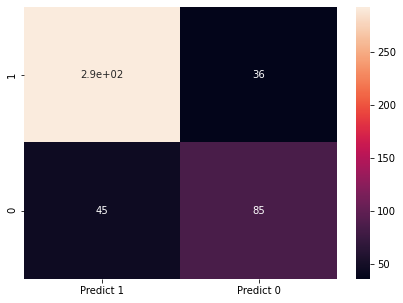

In [28]:
#confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [29]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



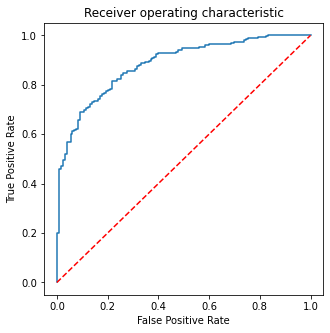

ROC_AUC score is  0.8827392120075047


In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lr_roc_auc = roc_auc_score(y_test, lrmodel.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lrmodel.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",lr_roc_auc)

## Linear Discriminant Analysis

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(x_train, y_train)
y_predict = ldamodel.predict(x_test)
train_score = ldamodel.score(x_train, y_train)
test_score= ldamodel.score(x_test, y_test)
print('Accuracy on train data:', train_score )
print('Accuracy on test data:', test_score )

Accuracy on train data: 0.8369259606373008
Accuracy on test data: 0.8187772925764192


              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



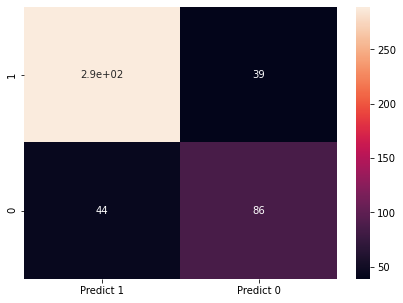

In [32]:
cm= metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print(metrics.classification_report(y_test, y_predict))

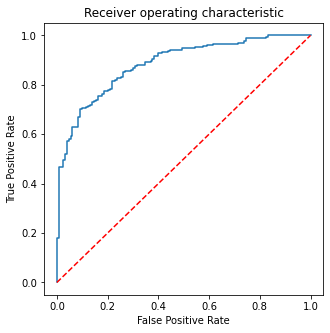

ROC_AUC score is  0.8837711069418386


In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lda_roc_auc = roc_auc_score(y_test, ldamodel.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, ldamodel.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",lda_roc_auc)

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

# KNN MODEL 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.30, random_state=1)

[0.7707423580786026,
 0.7489082969432315,
 0.8078602620087336,
 0.7969432314410481,
 0.8209606986899564,
 0.8253275109170306,
 0.8296943231441049,
 0.8209606986899564,
 0.8187772925764192,
 0.8187772925764192,
 0.8165938864628821,
 0.8144104803493449,
 0.8187772925764192,
 0.8231441048034934,
 0.8144104803493449,
 0.8253275109170306,
 0.8318777292576419,
 0.8318777292576419,
 0.8318777292576419]

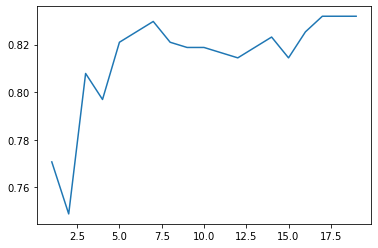

In [35]:
accuracy=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy.append(knn.score(x_test, y_test))
plt.plot(range(1,20),accuracy)
accuracy

In [36]:
NNH = KNeighborsClassifier(n_neighbors= 17)

In [37]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [38]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(x_test)
print("The accuracy of the KNN Model on train data is", NNH.score(x_train, y_train))
print("The accuracy of the KNN Model on test data is", NNH.score(x_test, y_test))

The accuracy of the KNN Model on train data is 0.837863167760075
The accuracy of the KNN Model on test data is 0.8318777292576419


Confusion Matrix


<AxesSubplot:>

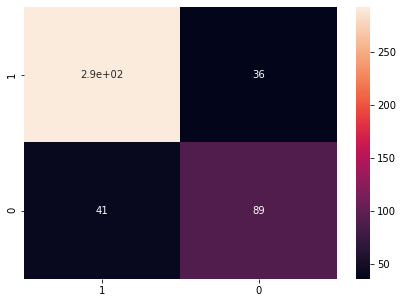

In [39]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1,0])

df_cm_knn = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_knn, annot=True)


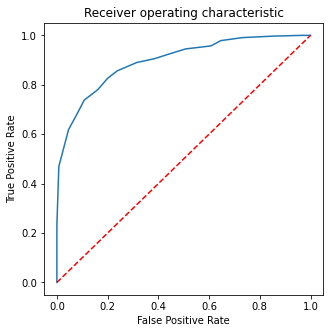

ROC_AUC score is  0.8967049718574108


In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, NNH.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",knn_roc_auc)

# Naive Bayes algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
nbmodel = GaussianNB()

nbmodel.fit(x_train, y_train.ravel())

GaussianNB()

In [42]:
train_predict = nbmodel.predict(x_train)

from sklearn import metrics

print("Model accuracy on training data: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

Model accuracy on training data: 0.8332



In [43]:
test_predict = nbmodel.predict(x_test)

from sklearn import metrics

print("Model accuracy on test set: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))
print()

Model accuracy on test set: 0.8253



Confusion Matrix


<AxesSubplot:>

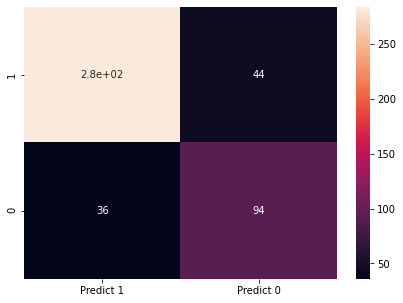

In [44]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [45]:
print("Classification Report")
print(metrics.classification_report(y_test, test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.87      0.88       328
           0       0.68      0.72      0.70       130

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



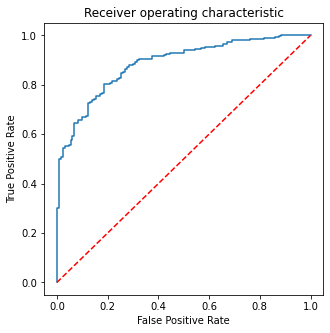

ROC_AUC score is  0.8845450281425891


In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

nb_roc_auc = roc_auc_score(y_test, nbmodel.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, nbmodel.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",nb_roc_auc)

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (6 marks)

## Logistic Regression (Grid Search)


In [47]:
from sklearn.metrics import f1_score, make_scorer
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
]
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=lrmodel, param_grid=param_grid, scoring='f1')
grid_search.fit(x_train, y_train)
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)
print('Accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on test data:',metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train data: 0.8397375820056232
Accuracy on test data: 0.8209606986899564


In [48]:
print(metrics.confusion_matrix(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[[ 87  43]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       130
           1       0.87      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



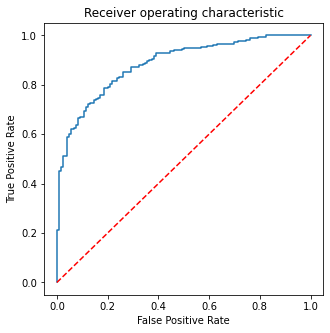

ROC_AUC score is  0.8843808630393996


In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lrgs_roc_auc = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % lrgs_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",lrgs_roc_auc)

## KNN (Grid Search)

In [50]:
grid_paramsx= {
    'n_neighbors': [7,11,12,13,14,15,16],
    'weights':['uniform', 'distance'],
    'metric':['euclidean','manhattan']
}

grid_search = GridSearchCV(NNH, param_grid=grid_paramsx, scoring='f1')
grid_search.fit(x_train, y_train)
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)
print('Accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on test data:',metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train data: 0.8406747891283973
Accuracy on test data: 0.8144104803493449


In [51]:
print(metrics.confusion_matrix(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[[ 86  44]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



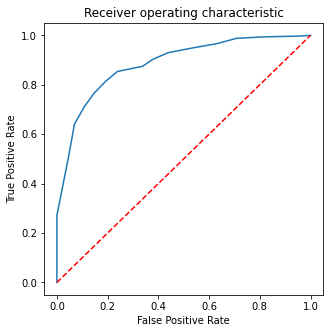

ROC_AUC score is  0.8857528142589118


In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knngs_roc_auc = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % knngs_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",knngs_roc_auc)

## Naïve Bayes Model (Grid Search)

In [53]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(nbmodel, param_grid=params_NB)
grid_search.fit(x_train, y_train)
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)
print('Accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on test data:',metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train data: 0.8359887535145267
Accuracy on test data: 0.834061135371179


In [54]:
print(metrics.confusion_matrix(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[[ 91  39]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       130
           1       0.88      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



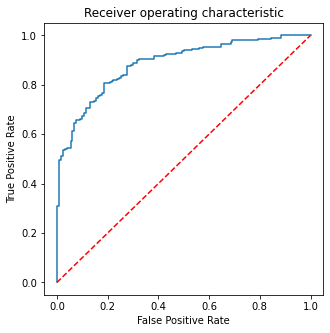

ROC_AUC score is  0.8839587242026268


In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

nbgs_roc_auc = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % nbgs_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",nbgs_roc_auc)

## Bagging (Random Forest)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print('Accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train) )
print('Accuracy on test data:',metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train data: 0.9990627928772259
Accuracy on test data: 0.8231441048034934


In [57]:
print(metrics.confusion_matrix(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[[ 92  38]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       130
           1       0.88      0.87      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.83      0.82      0.82       458



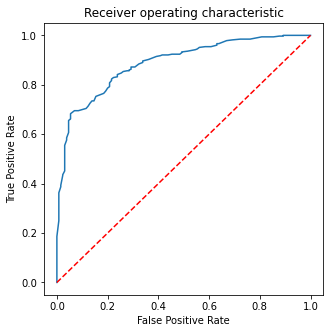

ROC_AUC score is  0.886796435272045


In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",rf_roc_auc)

## ADA-Boosting

In [59]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
y_pred_train = adb.predict(x_train)
y_pred_test = adb.predict(x_test)
print('Accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train) )
print('Accuracy on test data:',metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train data: 0.8425492033739457
Accuracy on test data: 0.8231441048034934


In [60]:
print(metrics.confusion_matrix(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[[ 90  40]
 [ 41 287]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



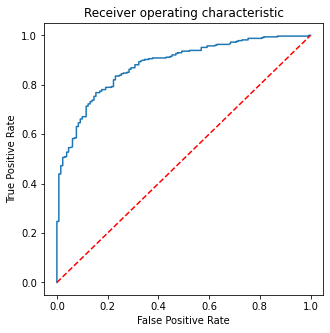

ROC_AUC score is  0.8801946529080675


In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

adb_roc_auc = roc_auc_score(y_test, adb.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, adb.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % adb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("ROC_AUC score is ",adb_roc_auc)

## Gradient Boosting


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)
print('Accuracy on train data:',metrics.accuracy_score(y_train, y_pred_train) )
print('Accuracy on test data:',metrics.accuracy_score(y_test, y_pred_test))

Accuracy on train data: 0.8865979381443299
Accuracy on test data: 0.8318777292576419


In [63]:
print(metrics.confusion_matrix(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



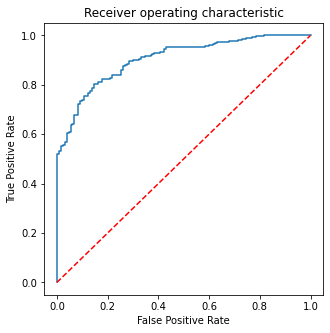

ROC_AUC score is  0.9036819887429645


In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

gb_roc_auc = roc_auc_score(y_test, gb.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Area Under the Curve (area = %0.5f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

print("ROC_AUC score is ",gb_roc_auc)

# Inferences

1.8 Based on these predictions, what are the insights? 



#### Conclusion
In correspondance of the buisness problem of election data, the data is first cleaned and preprocessed. After detailed study of the data using univariate and bivariate analysis different insights were drawn as follows:
1. Age range of voters: 24-93 years. Average age was around 55 years. 
2. Gender: Majority of them were females
3. Economic worth: There were few outliers among the voters considering very low economic worth (both national and household).Majority of the voters assessed the economic worth to be more than average an castes votes in favour of labour party.
4. Eurosceptic: Most of the voters were eurosceptic
5. Ratio of data: Most of the votes were in favour of Labour Party.  

After comparing the models, Naive Bayes grid search best is selected as the best method.  And it is predicting with a accuracy of 0.834. 
The confusion matrix suggests that majority of the votes are in favour of Labour Party. Hence, Laboour party will win the election with more than twice votes as compared to Conservative Party. 

#### Recommendations

1. The data from the voters of younger age group were missing and therefore they must be targeted. 
2. The data contains majority of female voters. Hence, male voters should be incorporated. 
3. Voters have assessed economic worth above average. Hence, not must focus is needed in this area.
4. Eurosceptism should be addressed. 

